# Mitochondrial density analyses
Loads some intermediate data from computestats.py and performs the mitochondrial density analysis from the current manuscript. 

The intermediate data include:
* `data/fullbranchstats.csv` - A dataframe describing the branches and compartments of each cell with clean compartment labels
* `data/cellwisestats.csv` - A dataframe that sums some of the measures in `fullbranchstats` across the branches of the same cell ID

In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

from lib import plot

#### Reading data

In [2]:
branchdf = pd.read_csv("data/fullbranchstats.csv", index_col=0)
cellwisedf = pd.read_csv("data/cellwisestats.csv", index_col=0)

In [3]:
branchdf.head()

,cellid,branchid,complbl,volume,surfacearea,synapsecount,synapsedensity,mitoindex,mitovol,mitovoldensity
0,648518346349539076,4877,2,19.603852,157.442853,27,0.171491,0.413111,0.455878,0.023255
1,648518346349539076,4939,0,1425.316497,1046.964909,117,0.111752,2.935288,21.281089,0.014931
2,648518346349539076,5514,2,201.230950,2056.340144,517,0.251418,0.721366,8.637407,0.042923
3,648518346349539076,5798,2,26.520838,278.630930,78,0.279940,0.983470,1.076463,0.040589
4,648518346349539076,6099,1,9.903893,76.783967,25,0.325589,0.315209,0.134453,0.013576


In [4]:
cellwisedf.head()

,cellid,complbl,volume,synapsecount,surfacearea,mitovol,nucvol,cytovol,mitovoldensity,synapsedensity
0,648518346349523266,0,1117.124307,95,983.256932,18.125386,469.021871,648.102436,0.027967,0.096618
1,648518346349523266,1,5.137237,0,41.550823,0.150325,0.000000,5.137237,0.029262,0.000000
2,648518346349523266,2,249.461426,540,2147.532717,7.771816,0.000000,249.461426,0.031154,0.251451
3,648518346349523266,3,420.640858,1090,3741.944204,16.543686,0.000000,420.640858,0.039330,0.291292
4,648518346349531729,0,1173.388933,105,1022.633604,19.326471,494.899762,678.489171,0.028485,0.102676


### Basal dendrite branches

In [5]:
# 0 -> soma, 1 -> axon,
# 2 -> basal dendrite, 3 -> apical dendrite
# 4 -> unknown dendrite, 5 -> unknown
denddf = branchdf[branchdf.complbl == 2]

(0.46712822214283656, 4.8520373203512984e-26)


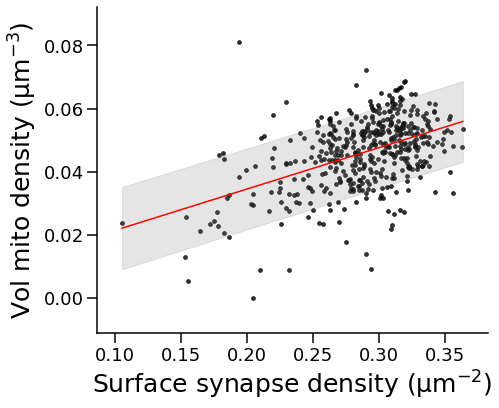

In [6]:
plt.figure(figsize=(7, 6))

r, p, _ = plot.scatterplot_df(denddf, "synapsedensity", "mitovoldensity")

print((r, p))

In [7]:
branchmodel = smf.mixedlm("mitovoldensity ~ synapsedensity",
                          denddf, groups=denddf["cellid"])
branchmodelfit = branchmodel.fit()

/usr/people/nturner/miniconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [8]:
branchmodelfit.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
           Mixed Linear Model Regression Results
============================================================
Model:            MixedLM Dependent Variable: mitovoldensity
No. Observations: 455     Method:             REML          
No. Groups:       65      Scale:              0.0001        
Min. group size:  3       Log-Likelihood:     1490.8067     
Max. group size:  13      Converged:          Yes           
Mean group size:  7.0                                       
------------------------------------------------------------
                  Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------
Intercept         -0.005    0.004 -1.419 0.156 -0.012  0.002
synapsedensity     0.178    0.012 14.594 0.000  0.154  0.202
Group Var          0.000    0.001                           
============================================================

"""

### Somata

(0.3518787494019342, 0.004047504937106375)


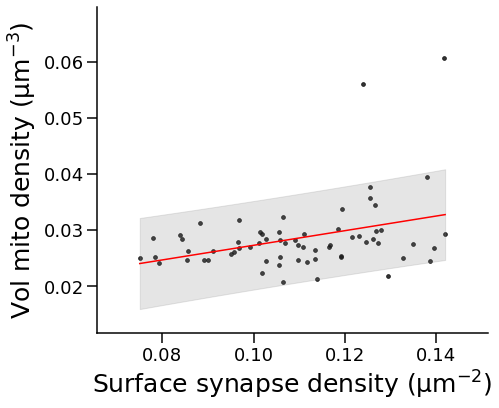

In [9]:
plt.figure(figsize=(7, 6))

# 0 -> soma, 1 -> axon,
# 2 -> basal dendrite, 3 -> apical dendrite
# 4 -> unknown dendrite, 5 -> unknown
somadf = cellwisedf[cellwisedf.complbl == 0]

r, p, _ = plot.scatterplot_df(somadf, "synapsedensity", "mitovoldensity")

print((r, p))

### Cross-compartment analyses

In [10]:
# 0 -> soma, 1 -> axon,
# 2 -> basal dendrite, 3 -> apical dendrite
# 4 -> unknown dendrite, 5 -> unknown
somadenddf = cellwisedf[cellwisedf.complbl.isin({0, 2})]

In [11]:
cellmodel = smf.ols("mitovoldensity ~ synapsedensity * complbl", somadenddf)
cellmodelfit = cellmodel.fit()

In [12]:
cellmodelfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         mitovoldensity   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     126.6
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           7.25e-38
Time:                        13:47:22   Log-Likelihood:                 480.14
No. Observations:                 130   AIC:                            -952.3
Df Residuals:                     126   BIC:                            -940.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.0143      0.005      2.917      0.004       0.005       0.024
synapsedensity             0.1299      0.044      2.938      0.004       0.042       0.217
complbl                    0.0079      0.006      1.427      0.156      -0.003       0.019
synapsedensity:complbl    -0.0329      0.028     -1.193      0.235      -0.088       0.022
==============================================================================
Omnibus:                       43.643   Durbin-Watson:                   2.505
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.927
Skew:                           1.175   Prob(JB):                     1.69e-33
Kurtosis:                       7.726   Cond. No.                         158.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
records = list()
def collapsebranches(subdf):
    record = dict()
    
    record["cellid"] = subdf.cellid.tolist()[0]
    fields = ["synapsedensity", "mitovoldensity"]
    compartments = [("soma", 0), ("axon", 1), ("basal", 2), ("apical", 3)]
    
    for (f, c) in itertools.product(fields, compartments):
        addfield(record, c[0] + f, f, c[1], subdf)
    
    records.append(record)


def addfield(record, destname, srcname, compartment, subdf):
    subsubdf = subdf[subdf.complbl == compartment]
    
    if len(subsubdf) == 0:
        record[destname] = np.nan
    elif len(subsubdf) == 1:
        record[destname] = subsubdf[srcname].item()

cellwisedf.groupby("cellid").apply(collapsebranches)
collapsedcellwise = pd.DataFrame.from_records(records).set_index("cellid")

### Synapse density

0.05936922967969266 0.6385140513078486


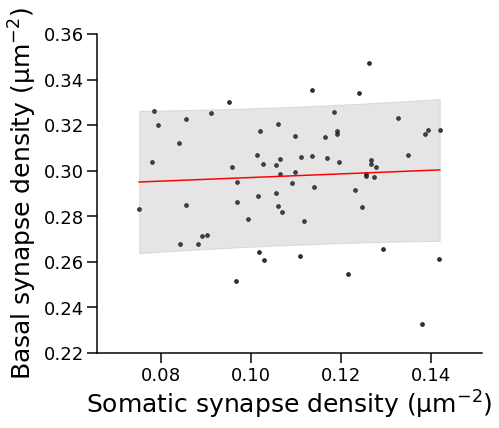

In [14]:
plt.figure(figsize=(7, 6))
r, p, fit = plot.scatterplot_df(
    collapsedcellwise, "somasynapsedensity", "basalsynapsedensity",
    xlbl="Somatic synapse density (" + plot.MU + "m$^{-2})$",
    ylbl="Basal synapse density (" + plot.MU + "m$^{-2})$")
print(r, p)

plt.tight_layout()

### Mitochondrial density

-0.03995388441864949 0.7520066244250776


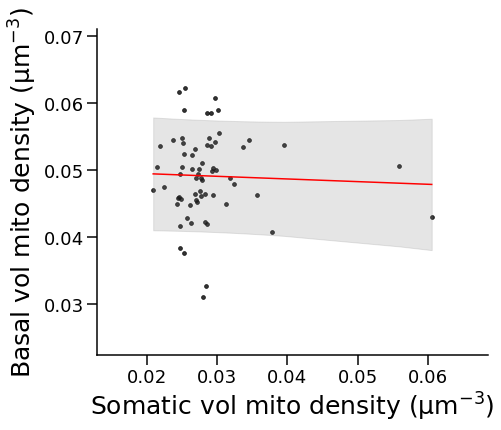

In [15]:
plt.figure(figsize=(7, 6))
r, p, fit = plot.scatterplot_df(
    collapsedcellwise, "somamitovoldensity", "basalmitovoldensity",
    xlbl="Somatic vol mito density (" + plot.MU + "m$^{-3})$",
    ylbl="Basal vol mito density (" + plot.MU + "m$^{-3})$")

print(r, p)